# How to Decode T3R Records

Jupyter Notebook to show how to decode T3R records.<br>

Author(s): *Martin Fränzl*

## Required Packages

In [5]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

import importlib
import pqreader.pqreader as pq # import package from local directory
importlib.reload(pq)

<module 'pqreader.pqreader' from 'C:\\Users\\mona\\Desktop\\pqreader\\pqreader\\pqreader.py'>

In [11]:
plt.rcParams.update({'font.size' : 14,
                     'axes.labelpad' : 10,
                     'xtick.major.pad': 8,
                     'xtick.major.size': 6,
                     'xtick.major.width': 1,
                     'ytick.major.size': 6,
                     'ytick.major.width': 1,
                     'xtick.minor.size': 3,
                     'xtick.minor.width': 1,
                     'ytick.minor.size': 3,
                     'ytick.minor.width': 1,
                     'axes.linewidth': 1,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'lines.linewidth' : 1.5,})

In [12]:
t3records, _ = pq.t3r_records('Data/Nile_Blue_Glycerol.t3r')

In [14]:
t3records[0] 

1606549743

In [15]:
np.binary_repr(t3records[0], 32)

'01011111110000100000000011101111'

In [21]:
valid_bits = 1
route_bits = 2
data_bits = 12
timetag_bits = 16

In [22]:
np.bitwise_and(np.right_shift(t3records[0], timetag_bits + data_bits + route_bits), 2**valid_bits - 1)

1

In [23]:
np.binary_repr(np.bitwise_and(np.right_shift(t3records[0], 16), 2**data_bits-1), data_bits)

'111111000010'

In [24]:
np.binary_repr(np.bitwise_and(t3records[0], 2**timetag_bits-1), timetag_bits)

'0000000011101111'

In [25]:
valid = np.bitwise_and(np.right_shift(t3records, timetag_bits + data_bits + route_bits), 2**valid_bits - 1).astype('uint8')
route = np.bitwise_and(np.right_shift(t3records, timetag_bits + data_bits), 2**route_bits - 1).astype('uint8')
data  = np.bitwise_and(np.right_shift(t3records, timetag_bits), 2**data_bits - 1).astype('uint16')
timetags = np.bitwise_and(t3records, 2**timetag_bits - 1).astype('uint64')

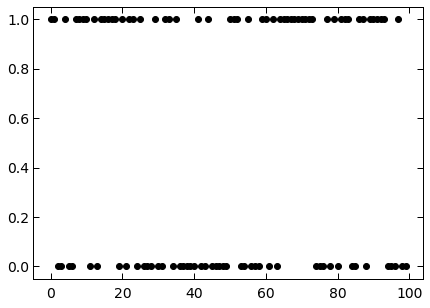

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(route[:100], 'ko')

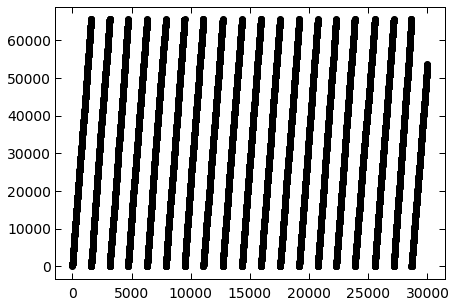

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(timetags[:30000], 'ko')

In [15]:
def correct_overflow(timetags, valid, overflow):
    overflow_idx = np.where(valid==0)[0]
    for i, (idx1, idx2) in enumerate(zip(overflow_idx[:-1], overflow_idx[1:])):
        timetags[idx1:idx2] += (i + 1)*overflow
    timetags[idx2:] += (i + 2)*overflow
    return np.delete(timetags, np.where(valid==0)[0])

In [16]:
overflow = 2**timetag_bits
timetags = correct_overflow(timetags, valid, overflow)

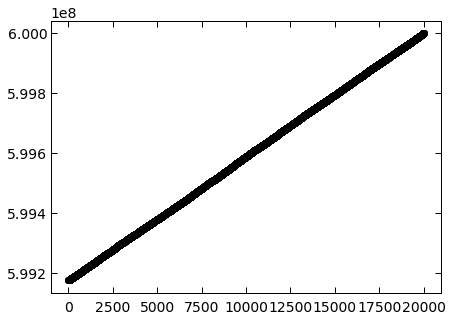

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(timetags[14510870:], 'ko')